In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ff = pd.read_csv('/home/sushil/forestfires.csv')

In [3]:
ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
ff.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
ff.shape

(517, 31)

In [6]:
ff.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
ff.corr().head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006


In [8]:
ff.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
ff['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:>

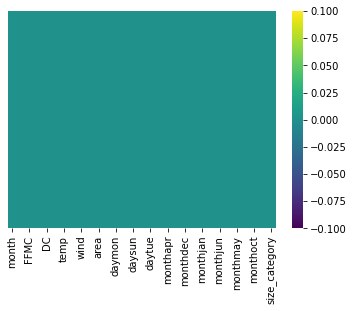

In [10]:
sns.heatmap(ff.isnull(), cmap = 'viridis', yticklabels = False)

<AxesSubplot:xlabel='month', ylabel='count'>

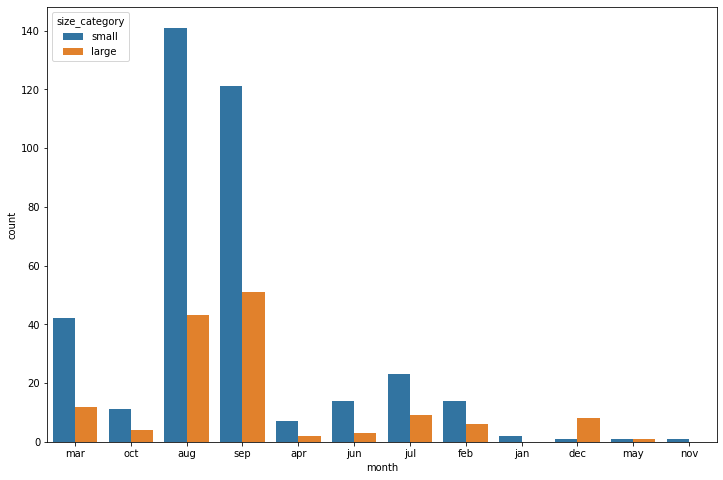

In [11]:
plt.figure(figsize = (12,8))
sns.countplot('month', hue = 'size_category', data = ff)

<AxesSubplot:xlabel='size_category', ylabel='rain'>

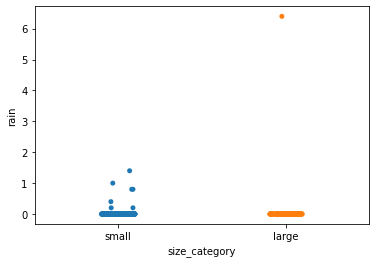

In [12]:
sns.stripplot(x = 'size_category', y = 'rain', data = ff)

<AxesSubplot:xlabel='size_category', ylabel='temp'>

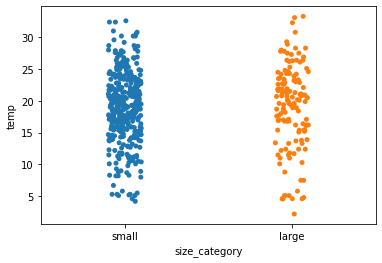

In [13]:
sns.stripplot(x = 'size_category', y = 'temp', data = ff)

<AxesSubplot:xlabel='size_category', ylabel='wind'>

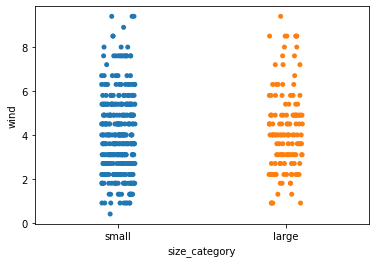

In [14]:
sns.stripplot(x = 'size_category' , y = 'wind',data = ff)

<AxesSubplot:xlabel='temp'>

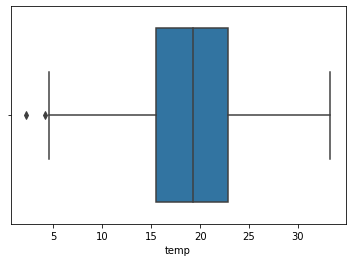

In [15]:
sns.boxplot(ff['temp'])

<AxesSubplot:xlabel='wind'>

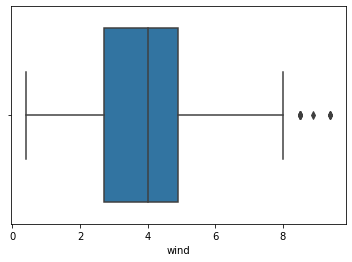

In [16]:
sns.boxplot(ff['wind'])

<AxesSubplot:xlabel='area'>

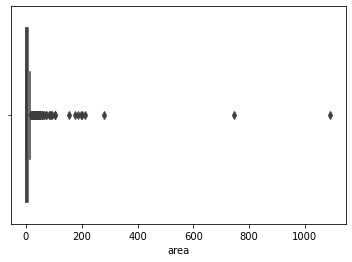

In [17]:
sns.boxplot(ff['area'])

<AxesSubplot:xlabel='DMC'>

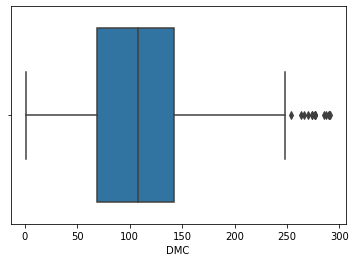

In [18]:
sns.boxplot(ff['DMC'])

<AxesSubplot:xlabel='DC'>

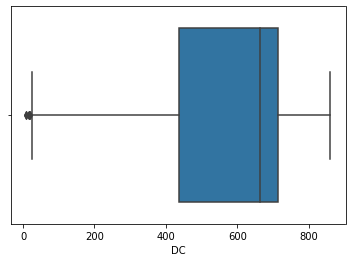

In [19]:
sns.boxplot(ff['DC'])

<AxesSubplot:xlabel='ISI'>

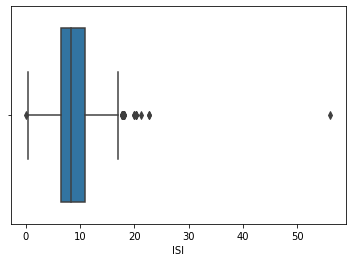

In [20]:
sns.boxplot(ff['ISI'])

In [21]:
fire = ff.drop(['month', 'day'], axis = 1)

In [22]:
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [23]:
x = fire.drop('size_category', axis = 1)

In [24]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
y = fire['size_category']

In [26]:
y.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

In [27]:
x = x[x.apply(lambda i: np.abs(i - i.mean()) / i.std() < 3).all(axis=1)]

In [28]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
fire = pd.concat([x,y], axis = 1)

In [30]:
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small


In [31]:
fire = fire.dropna(axis = 0)

In [32]:
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small
5,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,small
6,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,small
7,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,small
8,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,small


In [33]:
X =  fire.drop('size_category', axis = 1)

In [34]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
X.shape

(396, 28)

In [36]:
Y = fire['size_category']

In [37]:
Y.head()

0    small
5    small
6    small
7    small
8    small
Name: size_category, dtype: object

In [38]:
Y.shape

(396,)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaled_features = StandardScaler().fit_transform(X)

In [41]:
scaled_features

array([[-2.41248729, -1.65233156, -2.37894702, ...,  0.        ,
         0.        , -0.85839508],
       [ 0.22527322, -0.66374586, -0.56046375, ...,  0.        ,
         0.        , -0.85839508],
       [ 0.22527322, -0.60352744, -0.52535967, ...,  0.        ,
         0.        , -0.85839508],
       ...,
       [-4.40161817, -1.14214773,  0.25986297, ...,  0.        ,
         0.        , -0.85839508],
       [-4.40161817, -1.14214773,  0.25986297, ...,  0.        ,
         0.        , -0.85839508],
       [ 1.13335471,  0.35160358,  0.02475807, ...,  0.        ,
         0.        , -0.85839508]])

In [42]:
X = pd.DataFrame(scaled_features, index = X.index, columns = X.columns)

In [43]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-2.412487,-1.652332,-2.378947,-1.175349,-2.301808,0.532104,1.686935,-0.084048,-0.356533,2.236068,...,0.0,0.0,0.0,0.0,0.0,2.630589,0.0,0.0,0.0,-0.858395
5,0.225273,-0.663746,-0.560464,1.366293,0.495172,-0.949895,0.894062,-0.084048,-0.356533,-0.447214,...,0.0,0.0,0.0,0.0,0.0,-0.380143,0.0,0.0,0.0,-0.858395
6,0.225273,-0.603527,-0.525360,-0.275184,0.874763,-1.084622,-0.508714,-0.084048,-0.356533,-0.447214,...,0.0,0.0,0.0,0.0,0.0,-0.380143,0.0,0.0,0.0,-0.858395
7,-0.120663,0.341567,-0.005265,0.307276,-2.341765,2.889830,-1.057627,-0.084048,-0.356533,-0.447214,...,0.0,0.0,0.0,0.0,0.0,-0.380143,0.0,0.0,0.0,-0.858395
8,-0.336872,0.075603,0.384575,-0.672316,-1.322865,1.340467,0.894062,-0.084048,-0.356533,-0.447214,...,0.0,0.0,0.0,0.0,0.0,-0.380143,0.0,0.0,0.0,1.164965


In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
model = ExtraTreesClassifier()

In [46]:
model.fit(X,Y)

ExtraTreesClassifier()

In [47]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

In [48]:
feat_importances.head()

FFMC    0.046056
DMC     0.041494
DC      0.038298
ISI     0.040643
temp    0.072654
dtype: float64

In [49]:
feat_importances.nlargest(18)

area        0.553053
temp        0.072654
RH          0.067117
wind        0.063157
FFMC        0.046056
DMC         0.041494
ISI         0.040643
DC          0.038298
daysat      0.010925
dayfri      0.009335
daywed      0.009111
daysun      0.008470
monthsep    0.008111
monthaug    0.007412
daytue      0.006812
daymon      0.006719
daythu      0.005712
monthmar    0.004204
dtype: float64

<AxesSubplot:>

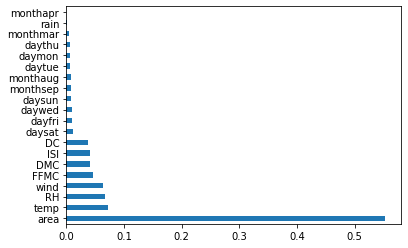

In [50]:
feat_importances.nlargest(20).plot(kind = 'barh')

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x = X[['area', 'temp', 'RH', 'wind', 'FFMC', 'ISI', 'DMC', 'DC', 'daysat', 'dayfri', 'daytue', 'daysun', 'daywed', 'monthaug', 'monthsep','daymon', 'daythu']]      

In [54]:
x.head()

,area,temp,RH,wind,FFMC,ISI,DMC,DC,daysat,dayfri,daytue,daysun,daywed,monthaug,monthsep,daymon,daythu
0,-0.356533,-2.301808,0.532104,1.686935,-2.412487,-1.175349,-1.652332,-2.378947,-0.42672,2.236068,-0.380143,-0.467399,-0.349017,-0.903612,-0.858395,-0.397360,-0.384482
5,-0.356533,0.495172,-0.949895,0.894062,0.225273,1.366293,-0.663746,-0.560464,-0.42672,-0.447214,-0.380143,2.139501,-0.349017,1.106670,-0.858395,-0.397360,-0.384482
6,-0.356533,0.874763,-1.084622,-0.508714,0.225273,-0.275184,-0.603527,-0.525360,-0.42672,-0.447214,-0.380143,-0.467399,-0.349017,1.106670,-0.858395,2.516611,-0.384482
7,-0.356533,-2.341765,2.889830,-1.057627,-0.120663,0.307276,0.341567,-0.005265,-0.42672,-0.447214,-0.380143,-0.467399,-0.349017,1.106670,-0.858395,2.516611,-0.384482
8,-0.356533,-1.322865,1.340467,0.894062,-0.336872,-0.672316,0.075603,0.384575,-0.42672,-0.447214,2.630589,-0.467399,-0.349017,-0.903612,1.164965,-0.397360,-0.384482


In [55]:
Y.head()

0    small
5    small
6    small
7    small
8    small
Name: size_category, dtype: object

In [56]:
fire2 = pd.concat([x,Y], axis = 1)

In [57]:
fire2.head()

,area,temp,RH,wind,FFMC,ISI,DMC,DC,daysat,dayfri,daytue,daysun,daywed,monthaug,monthsep,daymon,daythu,size_category
0,-0.356533,-2.301808,0.532104,1.686935,-2.412487,-1.175349,-1.652332,-2.378947,-0.42672,2.236068,-0.380143,-0.467399,-0.349017,-0.903612,-0.858395,-0.397360,-0.384482,small
5,-0.356533,0.495172,-0.949895,0.894062,0.225273,1.366293,-0.663746,-0.560464,-0.42672,-0.447214,-0.380143,2.139501,-0.349017,1.106670,-0.858395,-0.397360,-0.384482,small
6,-0.356533,0.874763,-1.084622,-0.508714,0.225273,-0.275184,-0.603527,-0.525360,-0.42672,-0.447214,-0.380143,-0.467399,-0.349017,1.106670,-0.858395,2.516611,-0.384482,small
7,-0.356533,-2.341765,2.889830,-1.057627,-0.120663,0.307276,0.341567,-0.005265,-0.42672,-0.447214,-0.380143,-0.467399,-0.349017,1.106670,-0.858395,2.516611,-0.384482,small
8,-0.356533,-1.322865,1.340467,0.894062,-0.336872,-0.672316,0.075603,0.384575,-0.42672,-0.447214,2.630589,-0.467399,-0.349017,-0.903612,1.164965,-0.397360,-0.384482,small


In [58]:
fire2.loc[fire.size_category == 'small', 'size_category'] = 0
fire2.loc[fire.size_category == 'large', 'size_category'] = 1

In [59]:
fire2.head()

,area,temp,RH,wind,FFMC,ISI,DMC,DC,daysat,dayfri,daytue,daysun,daywed,monthaug,monthsep,daymon,daythu,size_category
0,-0.356533,-2.301808,0.532104,1.686935,-2.412487,-1.175349,-1.652332,-2.378947,-0.42672,2.236068,-0.380143,-0.467399,-0.349017,-0.903612,-0.858395,-0.397360,-0.384482,0
5,-0.356533,0.495172,-0.949895,0.894062,0.225273,1.366293,-0.663746,-0.560464,-0.42672,-0.447214,-0.380143,2.139501,-0.349017,1.106670,-0.858395,-0.397360,-0.384482,0
6,-0.356533,0.874763,-1.084622,-0.508714,0.225273,-0.275184,-0.603527,-0.525360,-0.42672,-0.447214,-0.380143,-0.467399,-0.349017,1.106670,-0.858395,2.516611,-0.384482,0
7,-0.356533,-2.341765,2.889830,-1.057627,-0.120663,0.307276,0.341567,-0.005265,-0.42672,-0.447214,-0.380143,-0.467399,-0.349017,1.106670,-0.858395,2.516611,-0.384482,0
8,-0.356533,-1.322865,1.340467,0.894062,-0.336872,-0.672316,0.075603,0.384575,-0.42672,-0.447214,2.630589,-0.467399,-0.349017,-0.903612,1.164965,-0.397360,-0.384482,0


In [60]:
train,test = train_test_split(fire2,test_size = 0.3,random_state=42)

In [61]:
trainX = train.drop(["size_category"],axis=1)
trainY = train["size_category"]
testX = test.drop(["size_category"],axis=1)
testY = test["size_category"]

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [67]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model    

In [68]:
first_model = prep_model([17,50,40,20,1])
first_model.fit(np.array(trainX),np.array(trainY),epochs=500)

In [69]:
pred_train = first_model.predict(np.array(trainX))

In [70]:
pred_train

In [71]:
pred_train = pd.Series([i[0] for i in pred_train])

In [72]:
pred_train

In [73]:
category = ['small', 'large']

In [74]:
pred_train_category = pd.Series(["small"]*277)

In [75]:
pred_train_category

In [76]:
pred_train_category[[i>0.5 for i in pred_train]] = "large"

In [77]:
train["original_category"] = "small"

In [78]:
train.drop('original_class', axis = 1, inplace = True)

In [79]:
train.loc[train.size_category == 1,"original_category"] = "large"

In [80]:
train.original_category.value_counts()

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
confusion_matrix(pred_train_category,train.original_category)

In [83]:
print(classification_report(pred_train_category, train.original_category))

In [84]:
np.mean(pred_train_category==pd.Series(train.original_category).reset_index(drop=True))

In [85]:
pd.crosstab(pred_train_category,pd.Series(train.original_category).reset_index(drop=True))

In [86]:
pred_test = first_model.predict(np.array(testX))
pred_test = pd.Series([i[0] for i in pred_test])

In [87]:
pred_test

In [88]:
pred_test_class = pd.Series(["small"]*119)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test["original_category"] = "small"
test.loc[test.size_category==1,"original_category"] = "large"

In [89]:
test

In [90]:
test.original_category.value_counts()

In [91]:
np.mean(pred_test_class==pd.Series(test.original_category).reset_index(drop=True))

In [92]:
print(classification_report(pred_test_class, test.original_category))

In [93]:
confusion_matrix(pred_test_class, test.original_category)